In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
import time
from datetime import datetime, timedelta
from sklearn import svm
import pandas as pd

import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize


files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
     
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price['Unnamed: 0'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['Unnamed: 0']]
    price['Unnamed: 0'] = [row-timedelta(hours=8) for row in price['Unnamed: 0']]
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    print(file)
    
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,sentimentVector.rolling(5).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(10).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(15).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(20).mean()),axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    prices.append(price)

AAPL
AMZN
PEP
GOOGL
MSFT
FB
INTC
CSCO
CMCSA
NVDA
NFLX
BKNG
ADBE
AMGN
TXN
AVGO
PYPL
GILD
COST
QCOM


In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=print(len(x[0]))
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.39425051334702266
G-score: 0.4600157306919381
Accuracy 0.4778761061946903
Window: 140
[[348 158]
 [432 192]]
Vol pos 3.6428555203330397
Vol neg 2.745078713766485


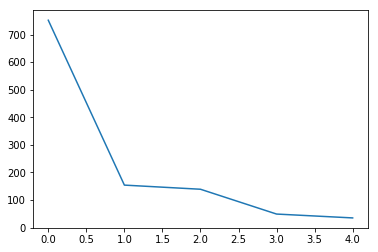

Real Percentage of gain: -56.702648749468075
Percentage of gain: 0.30756242465275707
Total gain: 347.5455398576155
000000000000000000000000000000000000000000000000
Percentile:  0
[[271 107]
 [321  54]]
0.4316069057104914
Percentile:  1
[[35 33]
 [52 32]]
0.4407894736842105
Percentile:  2
[[42 18]
 [24 55]]
0.697841726618705
Percentile:  3
[[ 0  0]
 [14 35]]
0.7142857142857143
Percentile:  4
[[ 0  0]
 [19 16]]
0.45714285714285713
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.266173752310536
G-score: 0.35543263078869347
Accuracy 0.29858657243816256
Window: 140
[[194  57]
 [737 144]]
Vol pos 2.2862250713210304
Vol neg 2.3956002958354885


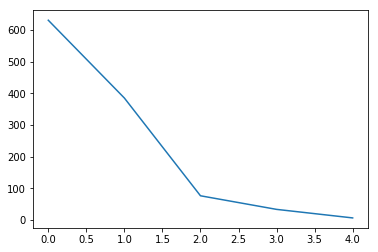

Real Percentage of gain: -157.28537763117137
Percentage of gain: -0.9976701067021815
Total gain: -1129.3625607868694
000000000000000000000000000000000000000000000000
Percentile:  0
[[179  20]
 [382  49]]
0.3619047619047619
Percentile:  1
[[ 11  25]
 [291  58]]
0.17922077922077922
Percentile:  2
[[ 4 12]
 [47 13]]
0.2236842105263158
Percentile:  3
[[ 0  0]
 [15 18]]
0.5454545454545454
Percentile:  4
[[0 0]
 [2 4]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.8742964352720449
G-score: 0.6829097869265477
Accuracy 0.794162826420891
Window: 140
[[ 51  40]
 [ 94 466]]
Vol pos 2.3063209739095734
Vol neg 1.2183876041756998


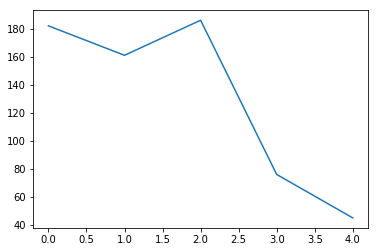

Real Percentage of gain: 110.99056492112084
Percentage of gain: 1.5808049225064602
Total gain: 1029.1040045517057
000000000000000000000000000000000000000000000000
Percentile:  0
[[33 39]
 [18 92]]
0.6868131868131868
Percentile:  1
[[18  1]
 [57 85]]
0.639751552795031
Percentile:  2
[[  0   0]
 [ 18 168]]
0.9032258064516129
Percentile:  3
[[76]]
1.0
Percentile:  4
[[45]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.6411483253588517
G-score: 0.4557202120609878
Accuracy 0.5353982300884956
Window: 140
[[136 319]
 [206 469]]
Vol pos 3.128770011558074
Vol neg 2.7553798675920094


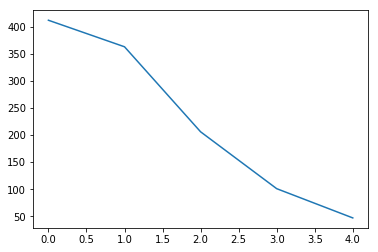

Real Percentage of gain: 38.060291462574106
Percentage of gain: 0.3949835632803803
Total gain: 446.33142650682976
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 78 154]
 [ 48 131]]
0.5085158150851582
Percentile:  1
[[ 31  80]
 [ 79 173]]
0.5619834710743802
Percentile:  2
[[23 74]
 [41 68]]
0.441747572815534
Percentile:  3
[[ 3 11]
 [37 50]]
0.5247524752475248
Percentile:  4
[[ 0  0]
 [ 1 46]]
0.9787234042553191
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.2702702702702703
G-score: 0.37210899177426776
Accuracy 0.4026548672566372
Window: 140
[[330  89]
 [586 125]]
Vol pos 1.2468538419425728
Vol neg 1.7963791932121262


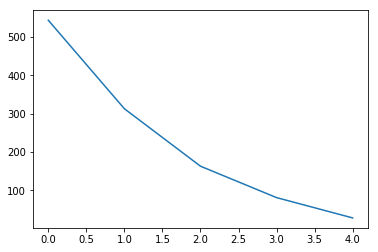

Real Percentage of gain: -39.68299358633923
Percentage of gain: -0.5710065994108979
Total gain: -645.2374573343146
000000000000000000000000000000000000000000000000
Percentile:  0
[[257  35]
 [226  26]]
0.5202205882352942
Percentile:  1
[[ 56  18]
 [194  45]]
0.3226837060702875
Percentile:  2
[[ 11  12]
 [104  36]]
0.2883435582822086
Percentile:  3
[[ 4 16]
 [48 13]]
0.20987654320987653
Percentile:  4
[[ 2  8]
 [14  4]]
0.21428571428571427
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.5295508274231678
G-score: 0.5408893301641866
Accuracy 0.4726148409893993
Window: 140
[[199  64]
 [533 336]]
Vol pos 3.3286033118910616
Vol neg 2.8527963613353555


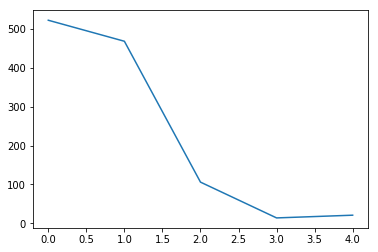

Real Percentage of gain: -70.67199771412417
Percentage of gain: 0.06862486231847242
Total gain: 77.68334414451078
000000000000000000000000000000000000000000000000
Percentile:  0
[[195  17]
 [259  51]]
0.47126436781609193
Percentile:  1
[[  3  34]
 [250 181]]
0.39316239316239315
Percentile:  2
[[ 0 13]
 [24 68]]
0.6476190476190476
Percentile:  3
[[14]]
1.0
Percentile:  4
[[21]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.3460410557184751
G-score: 0.40644575484198714
Accuracy 0.4090106007067138
Window: 140
[[286 162]
 [507 177]]
Vol pos 2.4806884602937602
Vol neg 2.2263503651083325


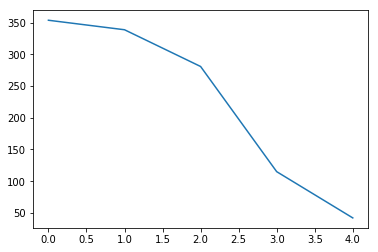

Real Percentage of gain: -111.16519344119047
Percentage of gain: -0.30112158758079793
Total gain: -340.8696371414633
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 69  47]
 [190  48]]
0.3305084745762712
Percentile:  1
[[ 75  39]
 [169  59]]
0.391812865497076
Percentile:  2
[[98 29]
 [89 62]]
0.5755395683453237
Percentile:  3
[[25 38]
 [49  2]]
0.23684210526315788
Percentile:  4
[[19  9]
 [ 8  6]]
0.5952380952380952
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.0
G-score: 0.0
Accuracy 0.424
Window: 140
[[477   0]
 [648   0]]
Vol pos 2.1656632374426183
Vol neg 1.6030781665288811


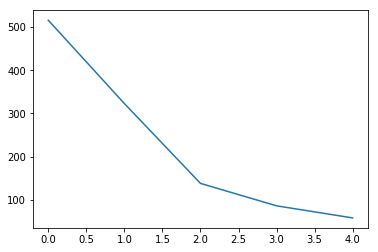

Real Percentage of gain: 14.120772035709779
Percentage of gain: -0.005131811244965421
Total gain: -5.773287650586099
000000000000000000000000000000000000000000000000
Percentile:  0
[[220   0]
 [296   0]]
0.4263565891472868
Percentile:  1
[[ 96   0]
 [227   0]]
0.29721362229102166
Percentile:  2
[[50  0]
 [88  0]]
0.36231884057971014
Percentile:  3
[[58  0]
 [28  0]]
0.6744186046511628
Percentile:  4
[[52  0]
 [ 6  0]]
0.896551724137931
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.47805788982259567
G-score: 0.5038391150494906
Accuracy 0.5061837455830389
Window: 140
[[317 223]
 [336 256]]
Vol pos 3.111600903645437
Vol neg 2.5959120114991925


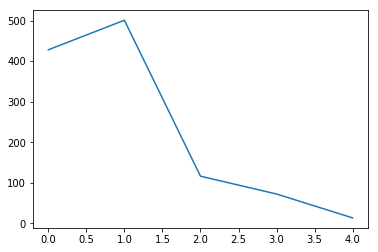

Real Percentage of gain: 45.30883551464595
Percentage of gain: 0.29313825385228504
Total gain: 331.83250336078663
000000000000000000000000000000000000000000000000
Percentile:  0
[[128  99]
 [139  62]]
0.4439252336448598
Percentile:  1
[[118  79]
 [161 143]]
0.5209580838323353
Percentile:  2
[[19 23]
 [26 48]]
0.5775862068965517
Percentile:  3
[[42 18]
 [ 9  3]]
0.625
Percentile:  4
[[9 4]
 [0 0]]
0.6923076923076923
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.5613701236917222
G-score: 0.5960044939725011
Accuracy 0.592756183745583
Window: 140
[[376 100]
 [361 295]]
Vol pos 4.039571116933426
Vol neg 3.377045749337729


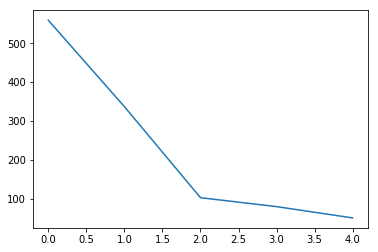

Real Percentage of gain: 239.80324197240574
Percentage of gain: 1.0191997606162861
Total gain: 1153.734129017636
000000000000000000000000000000000000000000000000
Percentile:  0
[[252  61]
 [187  59]]
0.556350626118068
Percentile:  1
[[102  15]
 [118 102]]
0.6053412462908012
Percentile:  2
[[19 12]
 [29 43]]
0.6019417475728155
Percentile:  3
[[ 3 12]
 [11 54]]
0.7125
Percentile:  4
[[ 0  0]
 [14 37]]
0.7254901960784313
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.32608695652173914
G-score: 0.38854959233195013
Accuracy 0.34275618374558303
Window: 140
[[208  89]
 [655 180]]
Vol pos 3.648447989675446
Vol neg 4.695574830337761


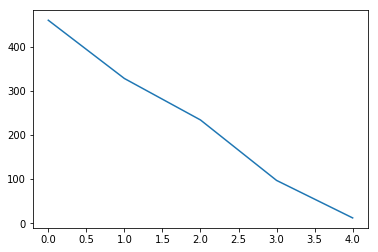

Real Percentage of gain: -241.55380760588295
Percentage of gain: -1.8356094114639758
Total gain: -2077.9098537772206
000000000000000000000000000000000000000000000000
Percentile:  0
[[134  36]
 [236  54]]
0.40869565217391307
Percentile:  1
[[ 38  22]
 [202  66]]
0.3170731707317073
Percentile:  2
[[ 20  18]
 [140  55]]
0.3218884120171674
Percentile:  3
[[15 12]
 [65  5]]
0.20618556701030927
Percentile:  4
[[ 0  1]
 [11  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.7649402390438248
G-score: 0.6950253928932716
Accuracy 0.7035175879396985
Window: 140
[[ 88  43]
 [ 75 192]]
Vol pos 1.2320352409089808
Vol neg 1.059924017767473


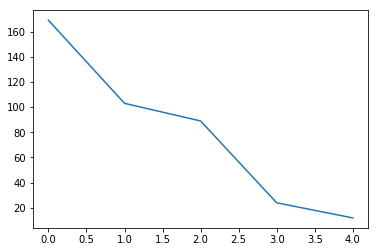

Real Percentage of gain: 148.68411834354552
Percentage of gain: 0.5525096315526452
Total gain: 219.8988333579528
000000000000000000000000000000000000000000000000
Percentile:  0
[[60 37]
 [20 55]]
0.6686046511627907
Percentile:  1
[[21  5]
 [22 52]]
0.73
Percentile:  2
[[ 7  0]
 [27 55]]
0.6966292134831461
Percentile:  3
[[ 0  0]
 [ 6 17]]
0.7391304347826086
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.06804374240583233
G-score: 0.18035462436834301
Accuracy 0.32063773250664307
Window: 140
[[334  54]
 [713  28]]
Vol pos 1.7660257068035023
Vol neg 2.9986085213425864


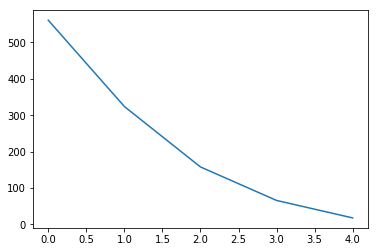

Real Percentage of gain: -275.8404821194356
Percentage of gain: -1.470887006206285
Total gain: -1660.631430006896
000000000000000000000000000000000000000000000000
Percentile:  0
[[250  27]
 [276   8]]
0.45989304812834225
Percentile:  1
[[ 49  14]
 [241  20]]
0.21296296296296297
Percentile:  2
[[ 14  11]
 [133   0]]
0.08860759493670886
Percentile:  3
[[21  2]
 [43  0]]
0.3181818181818182
Percentile:  4
[[ 0  0]
 [18  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.7383059418457648
G-score: 0.5330017908890261
Accuracy 0.6313446126447017
Window: 140
[[125 195]
 [219 584]]
Vol pos 2.0277002376568207
Vol neg 1.7660632537998195


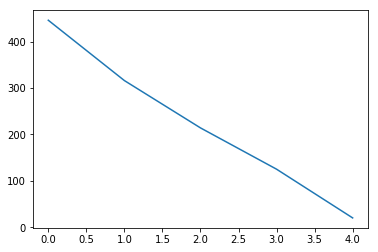

Real Percentage of gain: 169.70650344514993
Percentage of gain: 0.629108888179484
Total gain: 706.4892814255605
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 43 122]
 [ 76 205]]
0.5560538116591929
Percentile:  1
[[ 31  24]
 [ 76 185]]
0.6835443037974683
Percentile:  2
[[ 19   7]
 [ 57 131]]
0.7009345794392523
Percentile:  3
[[27 29]
 [10 59]]
0.688
Percentile:  4
[[ 4 13]
 [ 0  3]]
0.35
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.5680068434559452
G-score: 0.5895987155624577
Accuracy 0.5534924845269673
Window: 140
[[294  74]
 [431 332]]
Vol pos 2.2595284224793875
Vol neg 2.7887823970081405


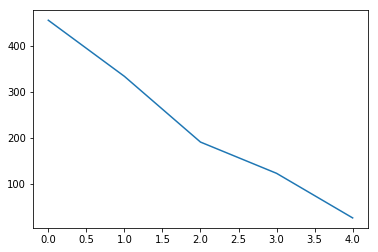

Real Percentage of gain: 23.38486158958187
Percentage of gain: 0.005419701134381636
Total gain: 6.12968198298563
000000000000000000000000000000000000000000000000
Percentile:  0
[[185  23]
 [150  97]]
0.6197802197802198
Percentile:  1
[[107  22]
 [114  91]]
0.592814371257485
Percentile:  2
[[  2  12]
 [103  75]]
0.4010416666666667
Percentile:  3
[[ 0 10]
 [62 50]]
0.4098360655737705
Percentile:  4
[[ 0  7]
 [ 2 17]]
0.6538461538461539
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.6470955652717052
G-score: 0.2790362128688839
Accuracy 0.4986690328305235
Window: 140
[[ 44 362]
 [203 518]]
Vol pos 3.5924795297766825
Vol neg 2.8134507007243643


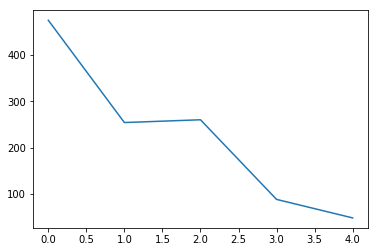

Real Percentage of gain: 33.49738417647766
Percentage of gain: 0.3809883316994054
Total gain: 429.37384982522985
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 43 158]
 [134 140]]
0.38526315789473686
Percentile:  1
[[  1 103]
 [ 36 114]]
0.452755905511811
Percentile:  2
[[  0  38]
 [ 33 189]]
0.7269230769230769
Percentile:  3
[[ 0 25]
 [ 0 63]]
0.7159090909090909
Percentile:  4
[[ 0 37]
 [ 0 11]]
0.22916666666666666
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.4883546205860255
G-score: 0.3937043824706376
Accuracy 0.39681133746678476
Window: 140
[[123 195]
 [486 325]]
Vol pos 3.2365549050558697
Vol neg 2.694995703262972


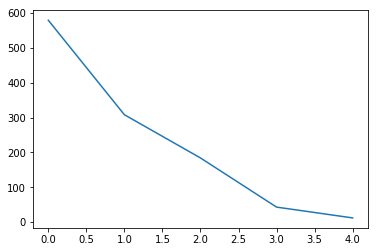

Real Percentage of gain: -179.34758681979784
Percentage of gain: -0.34128917312405144
Total gain: -385.31547645705405
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 38  96]
 [283 162]]
0.3454231433506045
Percentile:  1
[[ 20  31]
 [146 111]]
0.4253246753246753
Percentile:  2
[[57 63]
 [41 23]]
0.43478260869565216
Percentile:  3
[[ 8  5]
 [14 16]]
0.5581395348837209
Percentile:  4
[[ 0  0]
 [ 2 10]]
0.8333333333333334
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.340160284951024
G-score: 0.3432313161184996
Accuracy 0.34308510638297873
Window: 140
[[196 386]
 [355 191]]
Vol pos 2.973937127201249
Vol neg 3.377240789461645


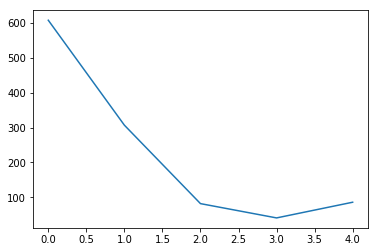

Real Percentage of gain: -277.00870903046786
Percentage of gain: -1.1982462382661307
Total gain: -1351.6217567641954
000000000000000000000000000000000000000000000000
Percentile:  0
[[123 216]
 [149 120]]
0.3996710526315789
Percentile:  1
[[ 40  63]
 [185  19]]
0.19218241042345277
Percentile:  2
[[ 0 12]
 [19 51]]
0.6219512195121951
Percentile:  3
[[ 7 34]
 [ 0  0]]
0.17073170731707318
Percentile:  4
[[26 60]
 [ 0  0]]
0.3023255813953488
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.0691358024691358
G-score: 0.18388920947791138
Accuracy 0.33096716947648624
Window: 140
[[345  40]
 [714  28]]
Vol pos 0.9866244050810702
Vol neg 1.586146971114618


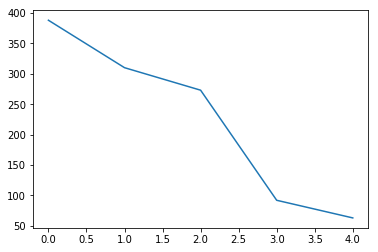

Real Percentage of gain: -223.72749011078471
Percentage of gain: -0.734644111025007
Total gain: -827.9439131251829
000000000000000000000000000000000000000000000000
Percentile:  0
[[174  26]
 [176  11]]
0.4780361757105943
Percentile:  1
[[ 92  12]
 [191  15]]
0.34516129032258064
Percentile:  2
[[ 66   2]
 [203   2]]
0.2490842490842491
Percentile:  3
[[12  0]
 [80  0]]
0.13043478260869565
Percentile:  4
[[ 0  0]
 [63  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.6231454005934718
G-score: 0.5563237835745983
Accuracy 0.5508399646330681
Window: 140
[[203 152]
 [356 420]]
Vol pos 3.807502505673513
Vol neg 2.792884379268662


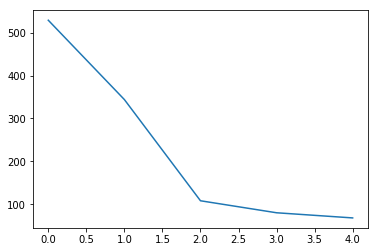

Real Percentage of gain: 43.90576113116728
Percentage of gain: 0.8428724989974519
Total gain: 953.288796366118
000000000000000000000000000000000000000000000000
Percentile:  0
[[125 105]
 [150 149]]
0.5179584120982986
Percentile:  1
[[ 18  30]
 [160 136]]
0.4476744186046512
Percentile:  2
[[ 9  9]
 [28 62]]
0.6574074074074074
Percentile:  3
[[12  0]
 [18 50]]
0.775
Percentile:  4
[[39  7]
 [ 0 22]]
0.8970588235294118
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.4792682592788523
Mean gain over portfolio :  -136.16269913234254
Real mean gain over portfolio -38.27619761081418


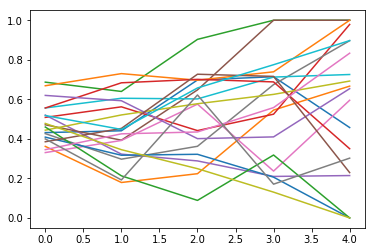

In [3]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        yprice=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        
        y=np.array(y)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        
        
        
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-6,4,30)
        gspace=np.logspace(-6,4,30)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

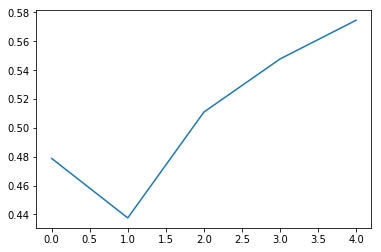

In [4]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/len(chartlist)
plt.plot(tot)
plt.show()

In [13]:
tempacc=accstocksresults

[0.50217266 0.48754152 0.48737069 0.49468748 0.5016594  0.497018
 0.50212919 0.53643528 0.52745541]


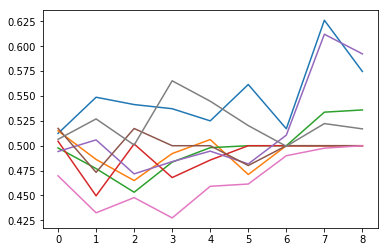

In [17]:
import operator
t=[0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    #for k in range(0,len(tempacc[i])):
        #print(tempacc[i][k])
     #   if(tempacc[i][k]<0.5):
      #     tempacc[i][k]=1-tempacc[i][k]
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
plt.show()

In [4]:
#AMAZN
[0, 0, 0, 0, 0, 500, 1000, 1500, 1500]
[0.5064935064935064, 0.4591078066914498, 0.4628252788104089, 0.5599250936329588, 0.5749063670411985, 0.6342412451361867, 0.6374269005847953, 0.7382413087934561, 0.728952772073922]
#CSCO
[0, 0, 0, 0, 0, 0, 0, 1500, 1500]
[0.46974697469746973, 0.4526431718061674, 0.5220264317180616, 0.4524336283185841, 0.4690265486725664, 0.5599547511312217, 0.6149490373725934, 0.7077997671711292, 0.7082847141190198]
#CMCS
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.5148514851485149, 0.5165198237885462, 0.4966960352422907, 0.5707964601769911, 0.5387168141592921, 0.5090497737556561, 0.5118912797281994, 0.5122235157159488, 0.456242707117853]
#ADBE
[0, 0, 0, 0, 0, 500, 500, 500, 1000]
[0.5082508250825083, 0.5242290748898678, 0.5462555066079295, 0.47345132743362833, 0.5342920353982301, 0.6628959276018099, 0.6761041902604756, 0.7357392316647264, 0.7374562427071178]
#AMGN
[0, 0, 0, 0, 0, 0, 0, 500, 500]
[0.5225522552255225, 0.4658590308370044, 0.5, 0.49668141592920356, 0.48283499446290146, 0.4287330316742081, 0.40543601359003395, 0.5227008149010477, 0.39556592765460913]
#AVGO
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.4752475247524752, 0.4845814977973568, 0.4889867841409692, 0.47123893805309736, 0.47345132743362833, 0.5520361990950227, 0.5413363533408834, 0.4540162980209546, 0.5215869311551925]
#COST
[0, 0, 0, 0, 0, 0, 0, 1000, 1000]
[0.47194719471947194, 0.4790748898678414, 0.5165198237885462, 0.5088495575221239, 0.5199115044247787, 0.5101809954751131, 0.5152887882219706, 0.6030267753201397, 0.617269544924154]

#AAPL
[0, 0, 0, 0, 0, 500, 500, 1500, 1500]
[0.5070671378091873, 0.5345132743362832, 0.5486725663716814, 0.5525846702317291, 0.5401069518716578, 0.6118299445471349, 0.562962962962963, 0.49612403100775193, 0.43190661478599224]

[0.5070671378091873,
 0.5345132743362832,
 0.5486725663716814,
 0.5525846702317291,
 0.5401069518716578,
 0.6118299445471349,
 0.562962962962963,
 0.49612403100775193,
 0.43190661478599224]